In [1]:
#Let's import libraries, obtain and view the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as ltb
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('internship_train.csv')
print(df.info())
df_test = pd.read_csv('internship_hidden_test.csv')
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [6]:
df.shape

(90000, 54)

In [7]:
df_test.shape

(10000, 53)

In [8]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,...,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,...,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,...,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,...,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,...,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015


In [9]:
for column in list(df.columns):
    col = (df[column] == 0).sum()
    print('Num of zeros in column {}: {}'.format(column,col))

Num of zeros in column 0: 200
Num of zeros in column 1: 184
Num of zeros in column 2: 169
Num of zeros in column 3: 190
Num of zeros in column 4: 192
Num of zeros in column 5: 185
Num of zeros in column 6: 903
Num of zeros in column 7: 0
Num of zeros in column 8: 45073
Num of zeros in column 9: 176
Num of zeros in column 10: 188
Num of zeros in column 11: 178
Num of zeros in column 12: 170
Num of zeros in column 13: 0
Num of zeros in column 14: 0
Num of zeros in column 15: 0
Num of zeros in column 16: 0
Num of zeros in column 17: 0
Num of zeros in column 18: 0
Num of zeros in column 19: 0
Num of zeros in column 20: 0
Num of zeros in column 21: 0
Num of zeros in column 22: 0
Num of zeros in column 23: 0
Num of zeros in column 24: 0
Num of zeros in column 25: 0
Num of zeros in column 26: 0
Num of zeros in column 27: 0
Num of zeros in column 28: 0
Num of zeros in column 29: 0
Num of zeros in column 30: 0
Num of zeros in column 31: 0
Num of zeros in column 32: 0
Num of zeros in column 33: 

In [10]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
target    0
dtype: int64

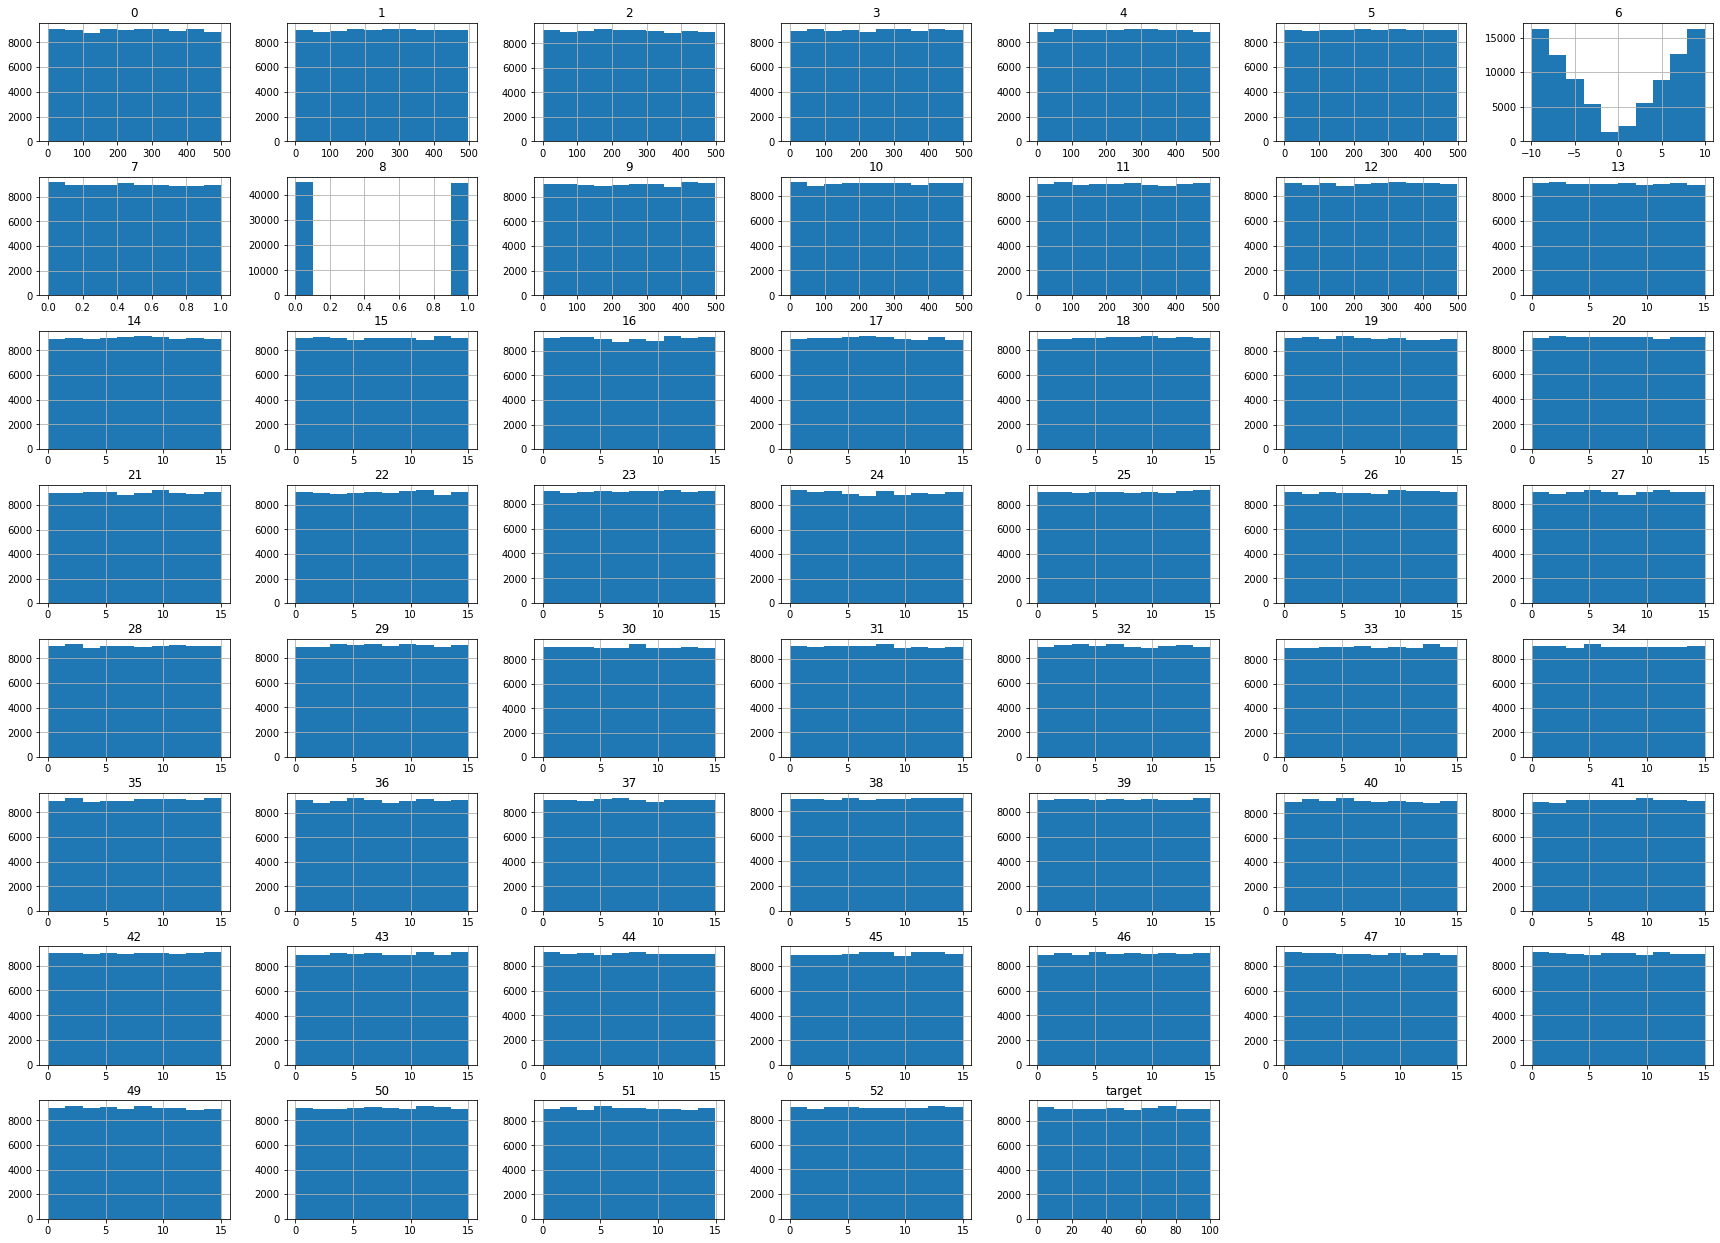

In [11]:
#Data distribution
df.hist(figsize=(30,22))
plt.show()

<AxesSubplot:>

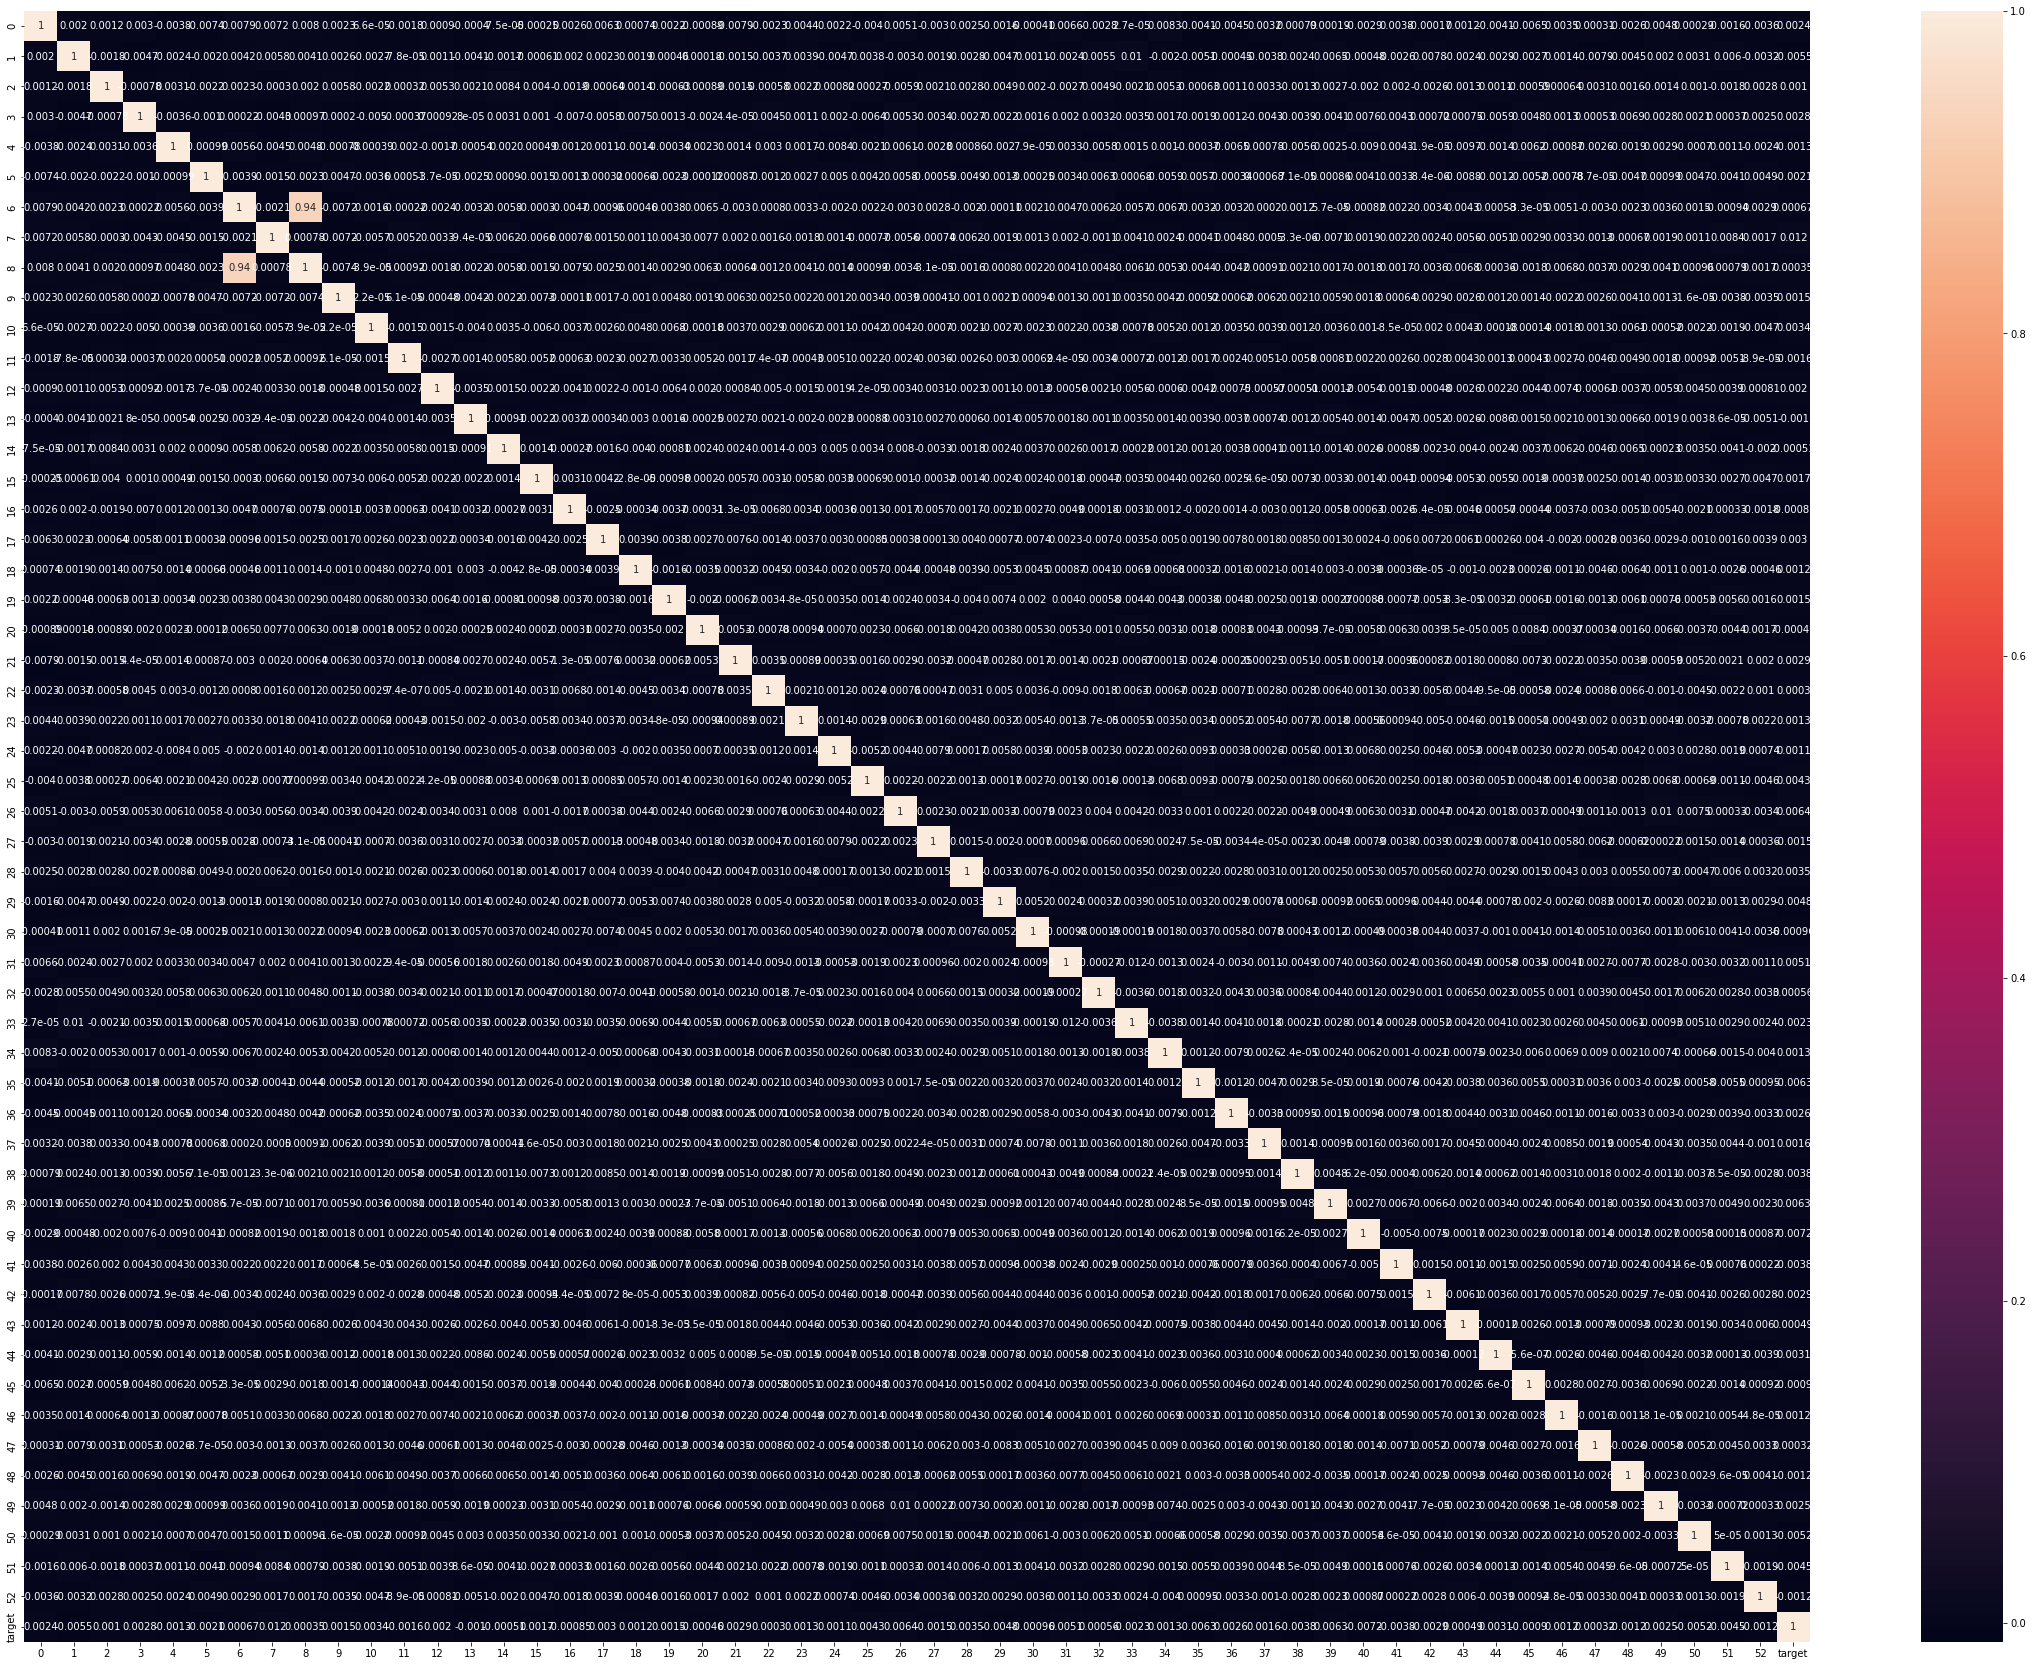

In [12]:
#Correlation
corr_matrix_pearson = df.corr(method='pearson')
plt.figure(figsize=(40,30))
sns.heatmap(corr_matrix_pearson, annot = True)

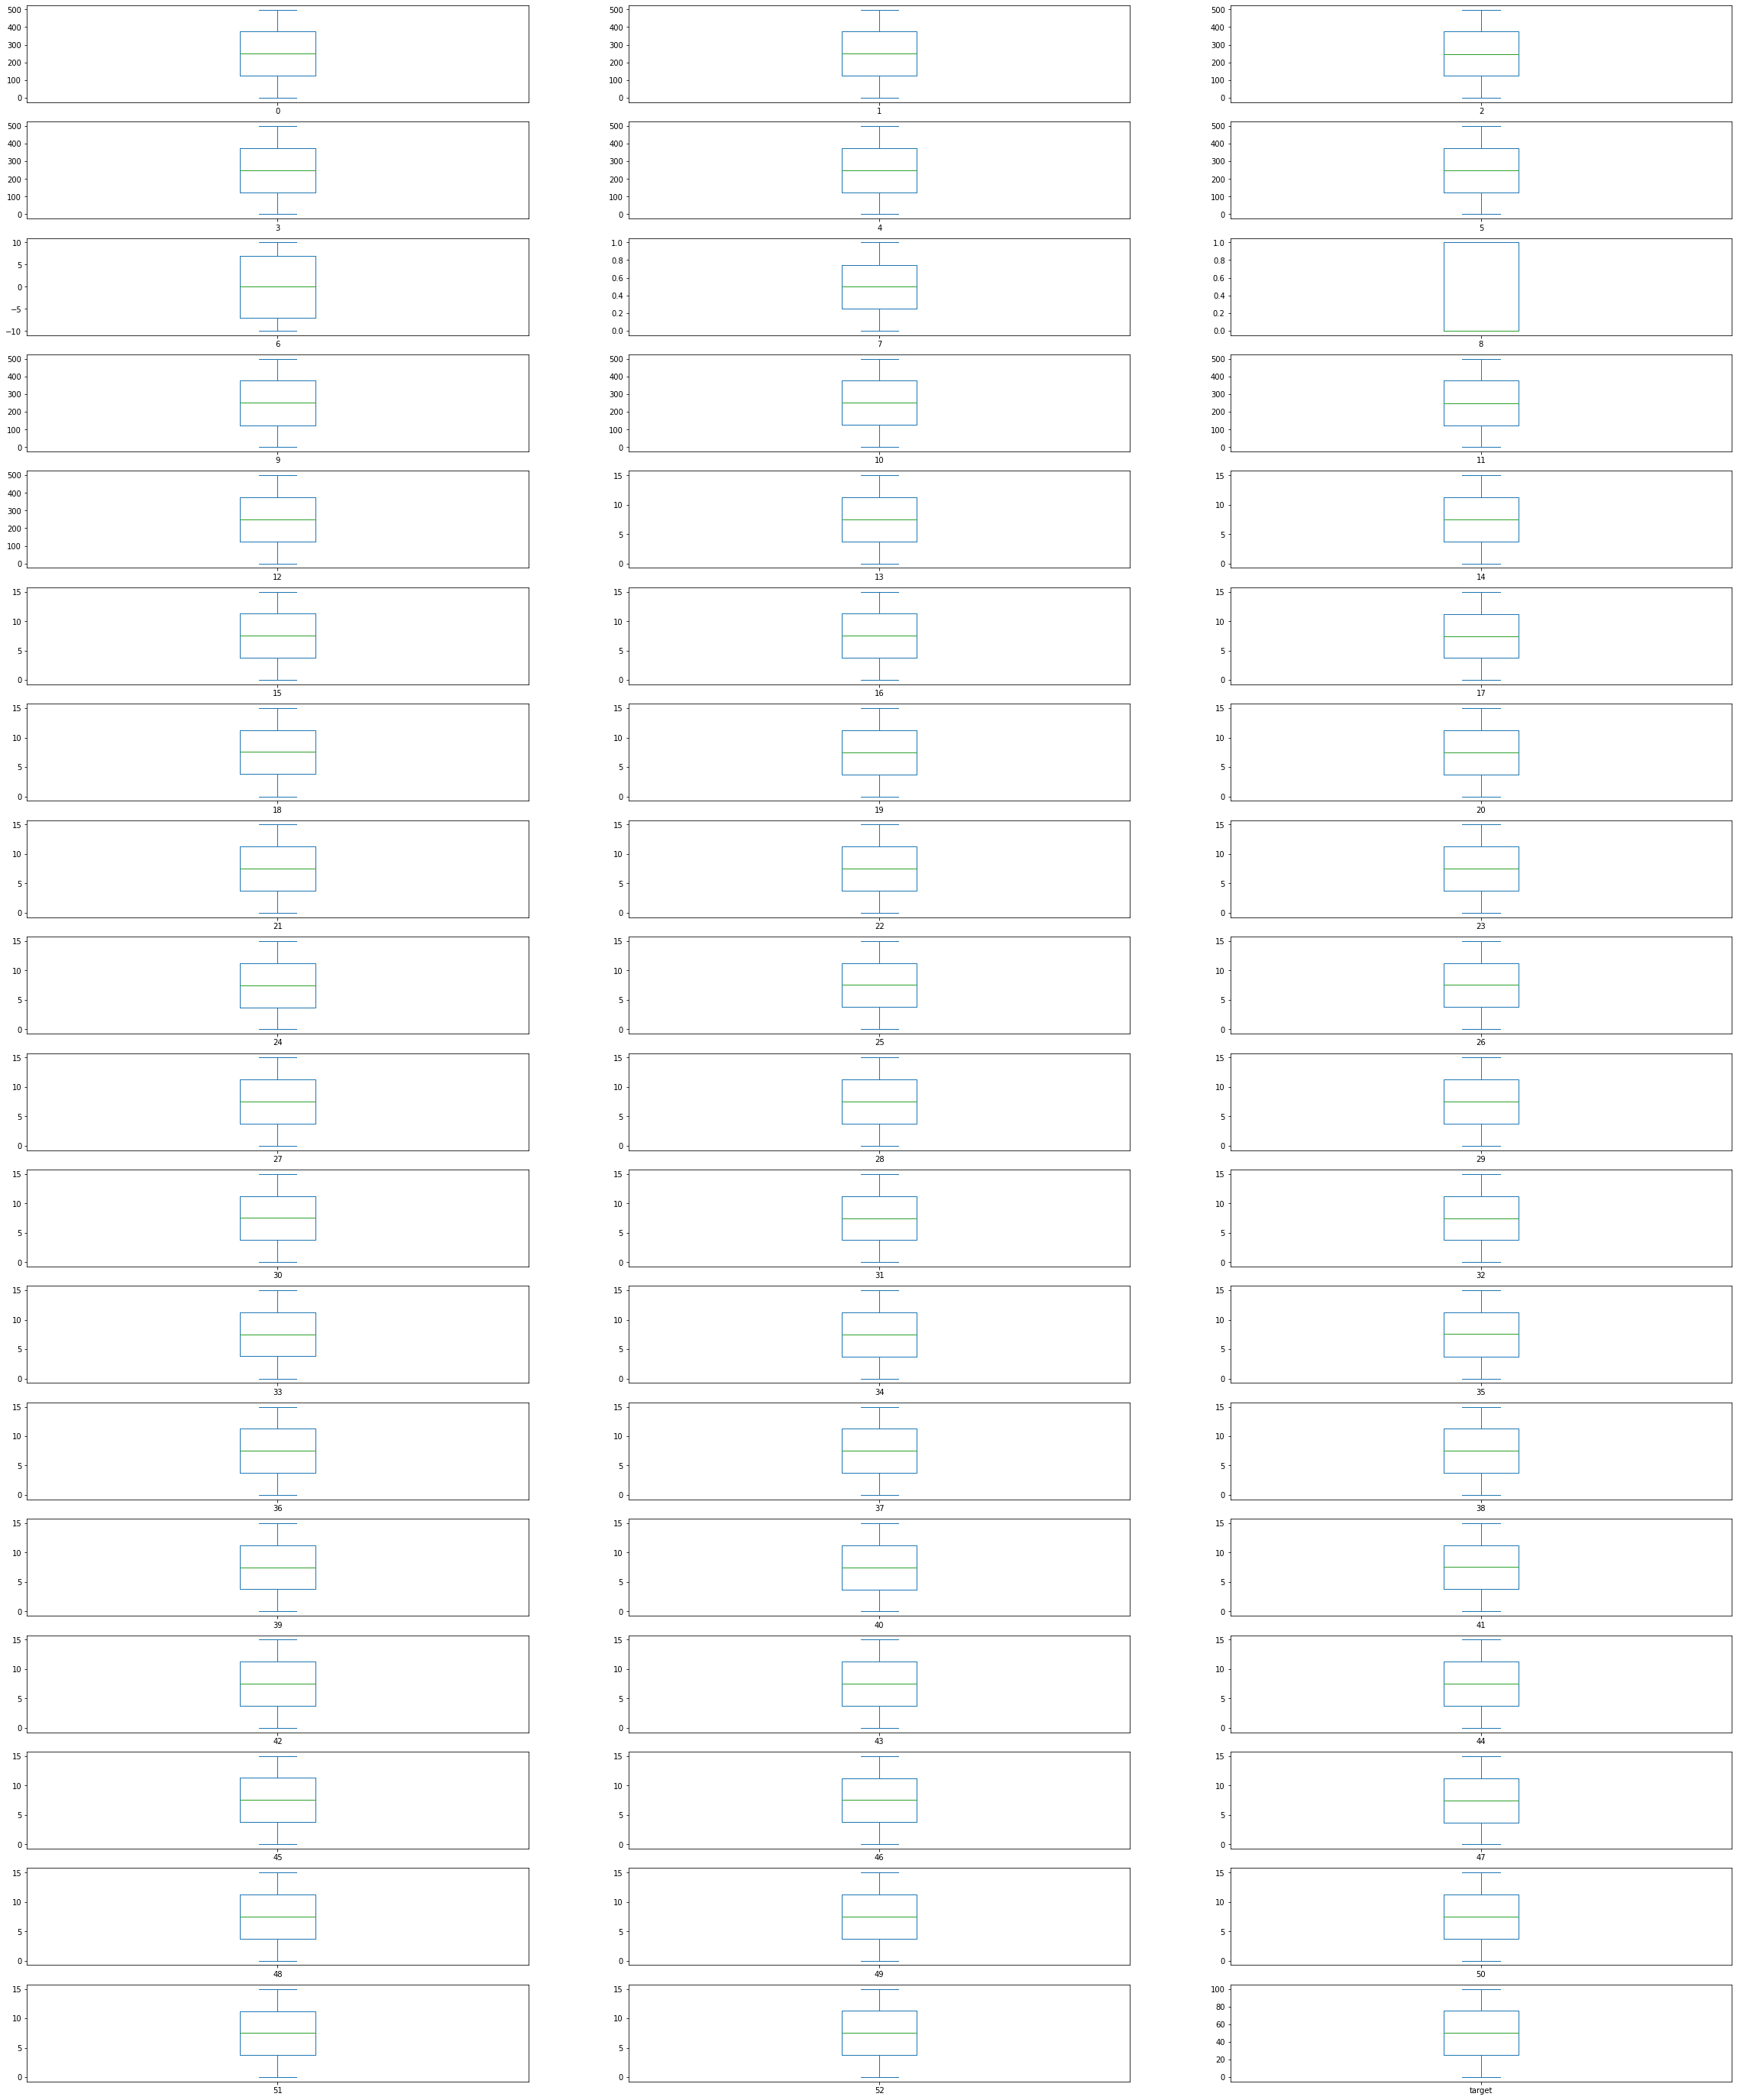

In [13]:
#Outliers detection
df.plot(kind="box",subplots=True,layout=(18,3),figsize=(40,50));

<AxesSubplot:>

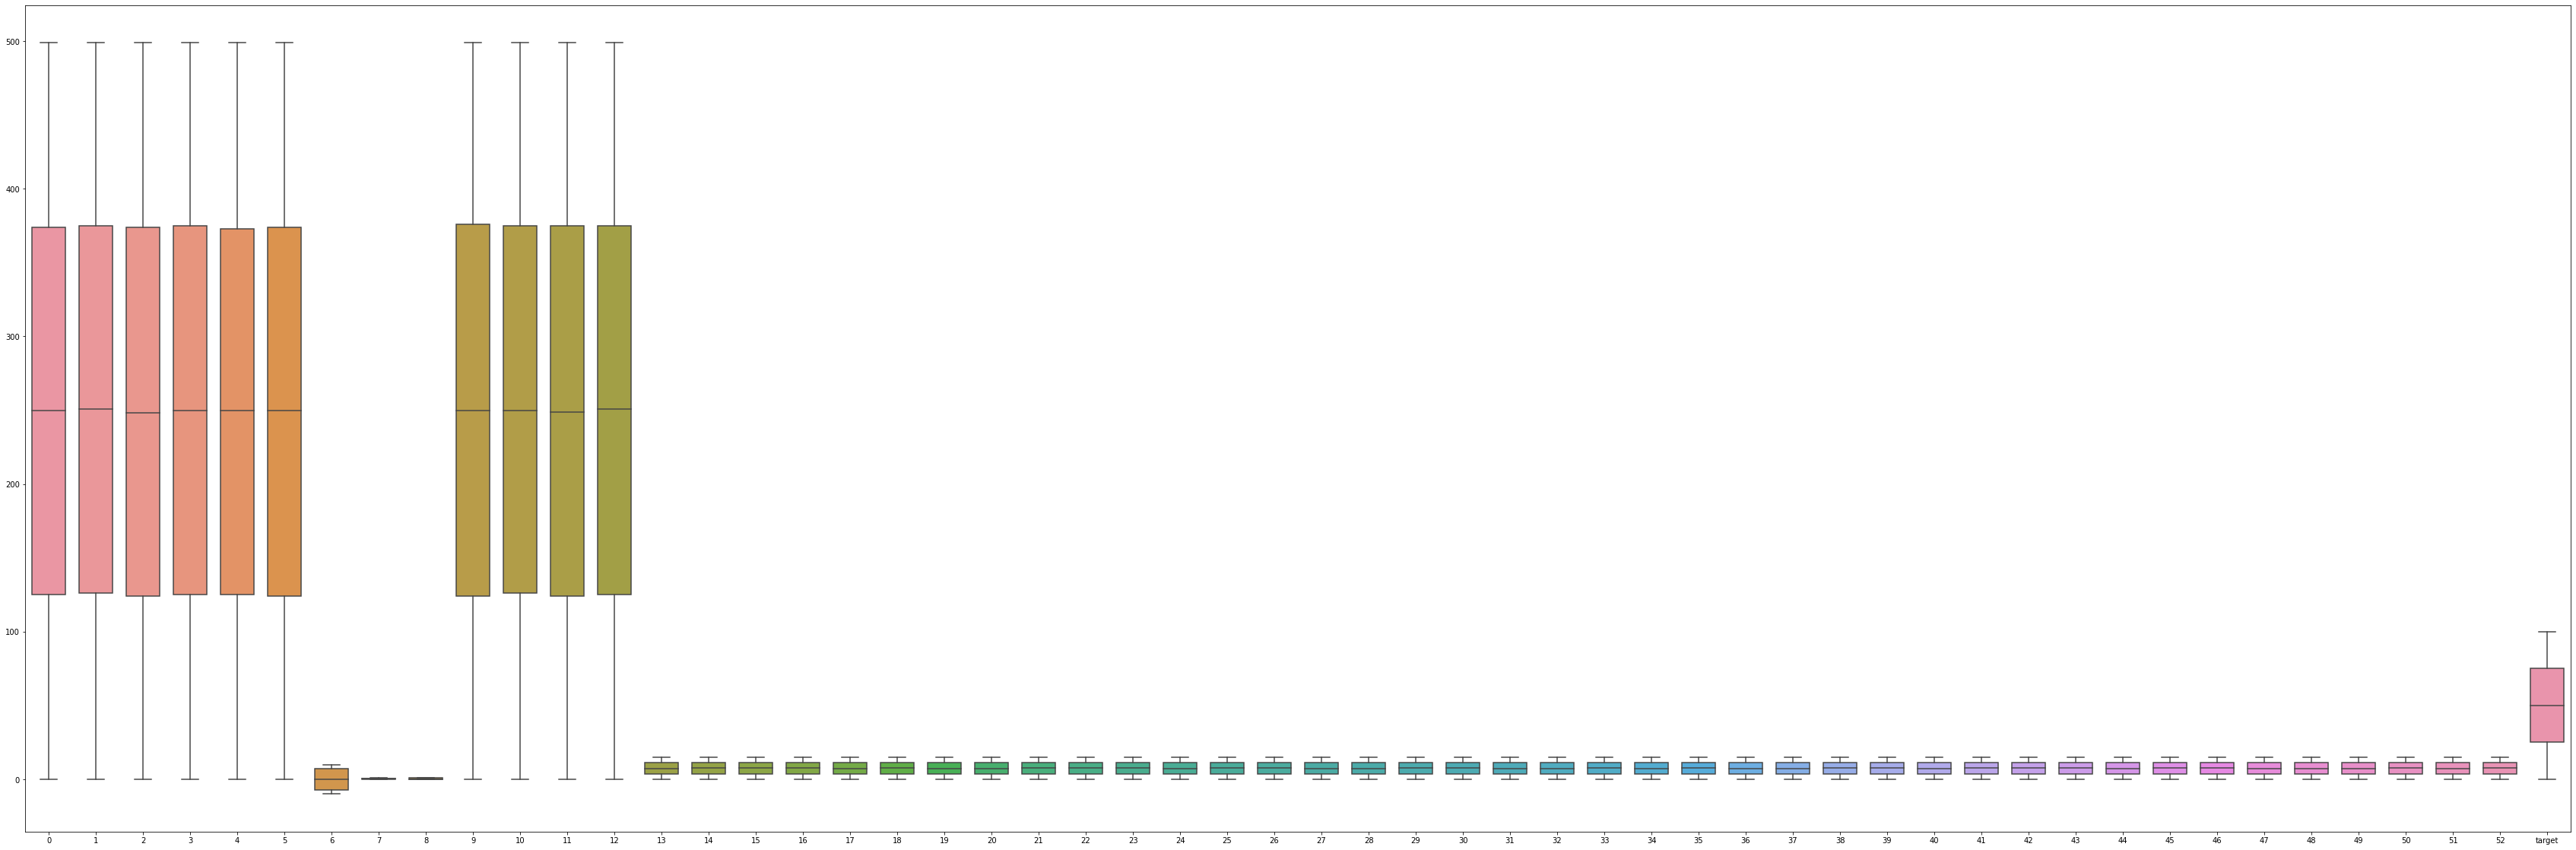

In [14]:
#Outliers detection
fig,ax = plt.subplots(figsize=(60,20),facecolor='white')
sns.boxplot(data = df , ax = ax ,width = 0.7 , fliersize = 5)

In [15]:
X =  df.drop(["target"],axis = 1)
y = df["target"]

In [16]:
# Split into training and validation groups and scaling
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [17]:
X_predict_test = scaler.fit_transform(df_test)

In [20]:
#Building models
models = [
           ['DecisionTreeRegressor: ', DecisionTreeRegressor()],
           ['Lasso:', Lasso(alpha =0.0005, random_state=1, max_iter = 100000, normalize = True)],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['LGBMRegressor:',ltb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)],
           ['XGBRegressor: ', xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)]
         ]

In [21]:
#Model's metrics
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Train_RMSE_Score"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

C:\Users\dzyub\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[12:04:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if

In [22]:
results_df = pd.DataFrame(model_data)

In [23]:
results_df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Train_RMSE_Score,Test_RMSE_Score
0,DecisionTreeRegressor:,4.141555,1.000000,0.998936,1.534667e-08,0.945894
1,Lasso:,1.770227,0.000374,-0.000367,2.886512e+01,29.005306
2,RandomForest,204.485555,1.000000,0.998936,1.530194e-03,0.945897
3,ExtraTreeRegressor :,72.250245,1.000000,0.999044,9.657251e-09,0.896848
4,LGBMRegressor:,0.865762,0.998649,0.997559,1.061152e+00,1.432743
5,XGBRegressor:,45.981254,0.999976,0.998921,1.416470e-01,0.952640


In [24]:
cur_model = ltb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
cur_model.fit(X_train,y_train)
prediction = cur_model.predict(X_predict_test)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [25]:
prediction

array([12.65401406, 77.432072  ,  8.99794095, ..., 25.36244553,
       17.01257864, 94.23162533])